<a href="https://colab.research.google.com/github/segnig/Tanzania-Tourism-Prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
FILE_PATH = "/content/drive/MyDrive/Data Science/Tanzania Tourism Prediction/"

# Import Libraries


*   `pandas` for data manipulation.
*   `numpy` for mathematics.
*   `matplotlib.pyplot` and `seaborn`  for data visualization.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File Path


In [3]:
TRAIN_FILE_PATH = FILE_PATH + "Train.csv"
TEST_FILE_PATH = FILE_PATH + "Test.csv"

## Load Data

Load data to DataFrame

In [4]:
train_df = pd.read_csv(TRAIN_FILE_PATH)
test_df = pd.read_csv(TEST_FILE_PATH)

**Shape of train data**

In [5]:
train_df.shape

(4809, 23)

In [6]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


**Dataframe informations**

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [23]:
# Cardinality of the features across data
cardinality = train_df.nunique().sort_values(ascending=False)

# cardinality two
cardinality_2 = (cardinality[cardinality.values == 2].index).to_list()
cardinality_2

['package_insurance',
 'first_trip_tz',
 'package_food',
 'package_guided_tour',
 'package_sightseeing',
 'package_transport_tz',
 'package_transport_int',
 'tour_arrangement',
 'package_accomodation']

In [56]:
train_df[cardinality_2].head()

,package_insurance,first_trip_tz,package_food,package_guided_tour,package_sightseeing,package_transport_tz,package_transport_int,tour_arrangement,package_accomodation
0,No,No,No,No,No,No,No,Independent,No
1,No,Yes,No,No,No,No,No,Independent,No
2,No,No,No,No,No,No,No,Independent,No
3,No,Yes,Yes,Yes,Yes,Yes,No,Package Tour,Yes
4,No,Yes,No,No,No,No,No,Independent,No


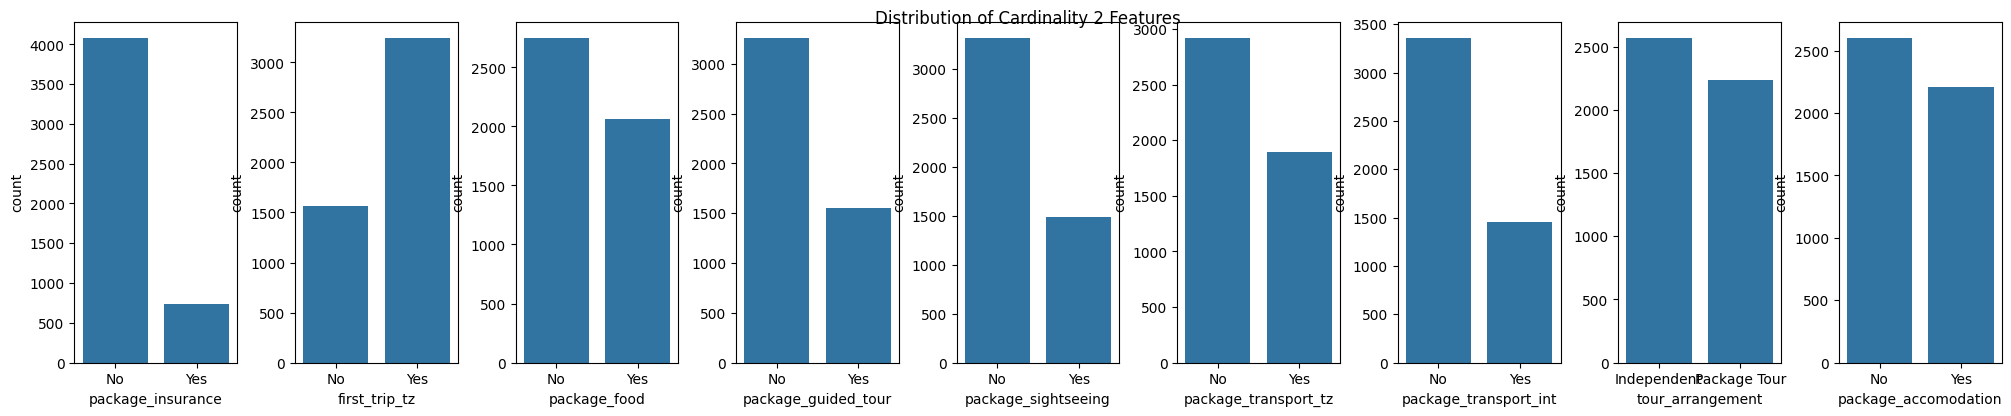

In [57]:
# plot distribution for cardinality_2 features
fig, ax = plt.subplots(1, len(cardinality_2))
fig.set_size_inches(20, 4)
fig.tight_layout()
fig.suptitle("Distribution of Cardinality 2 Features")

for i in range(len(cardinality_2)):
    sns.countplot(x=cardinality_2[i], data=train_df, ax=ax[i])

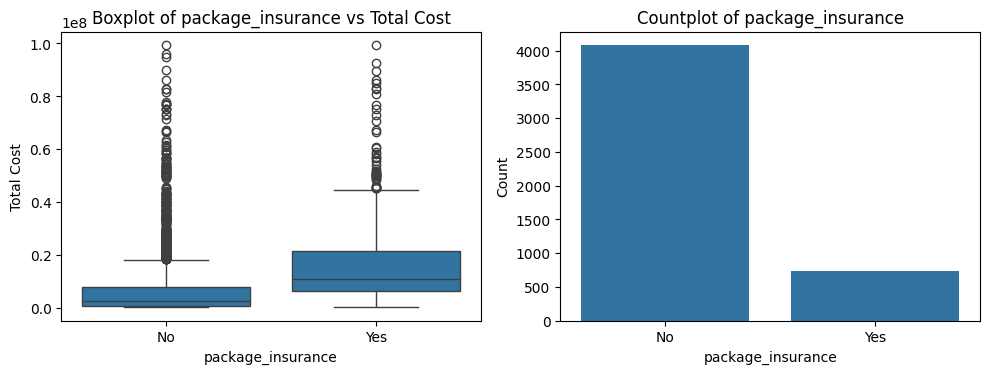

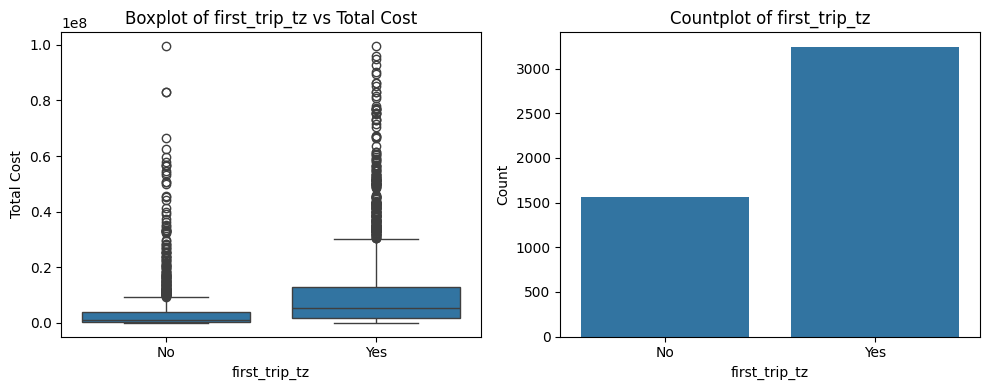

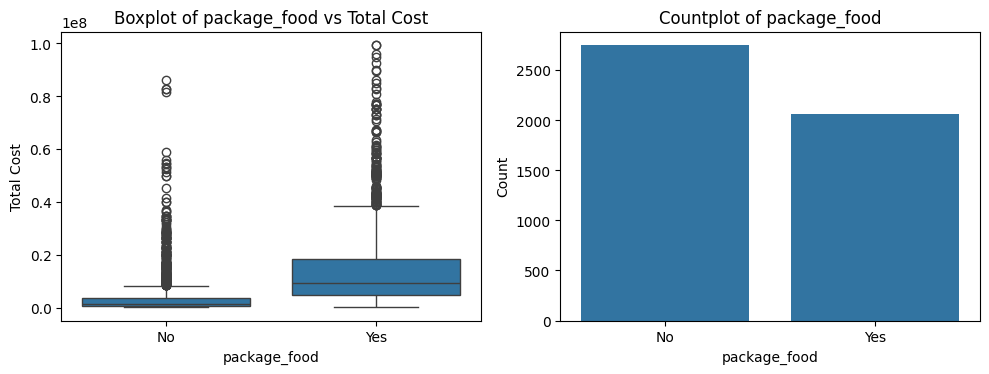

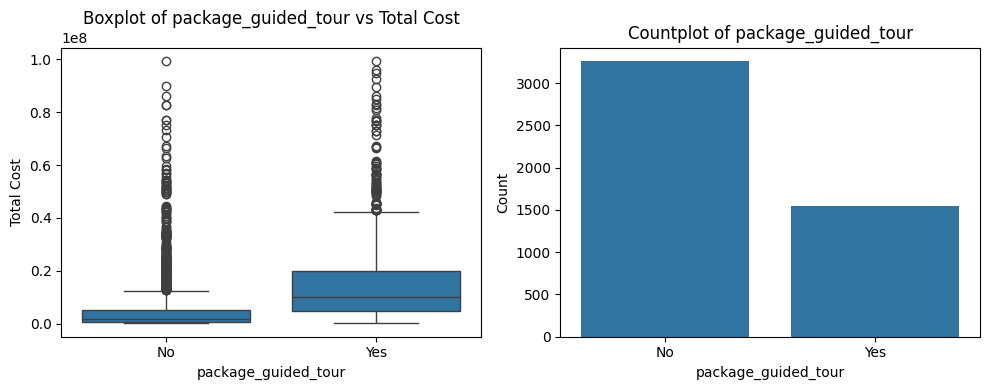

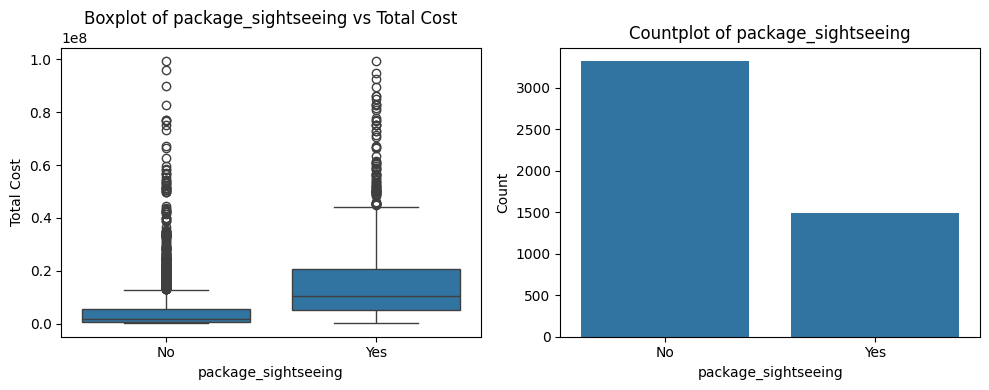

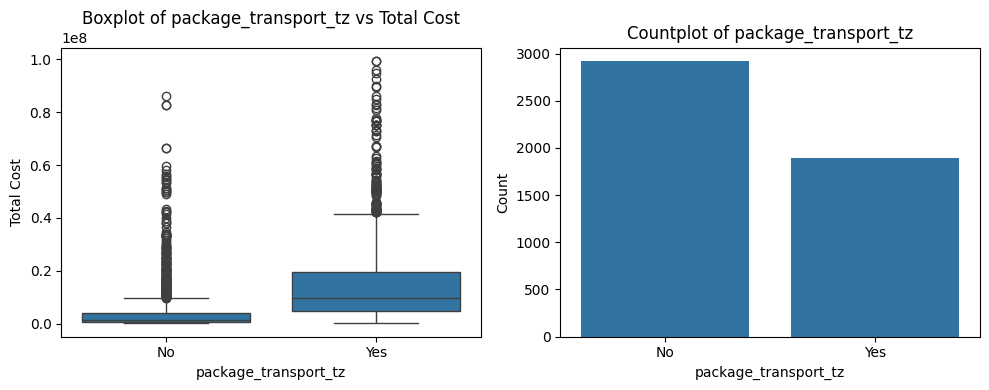

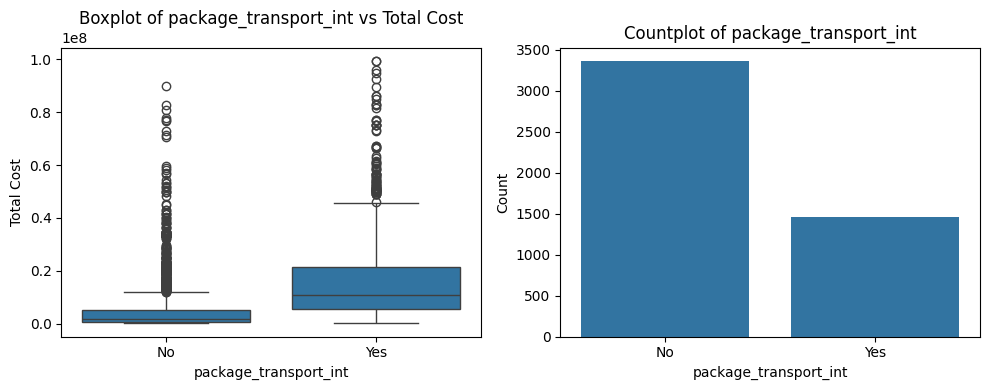

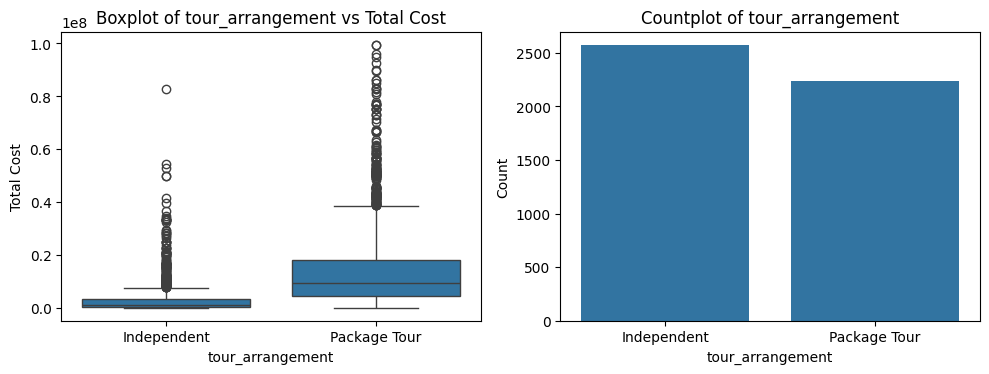

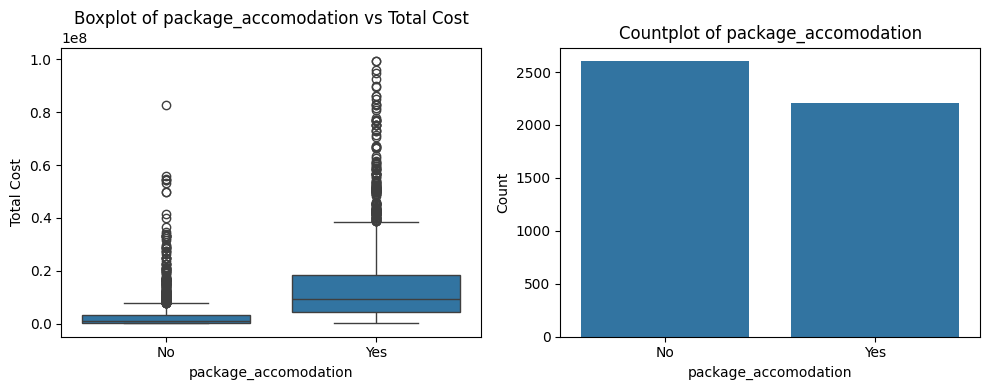

In [69]:
# Box plot of two cardinal feature

import matplotlib.pyplot as plt
import seaborn as sns

for col in cardinality_2:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))  # Adjust figure size
    sns.boxplot(x=col, y="total_cost", data=train_df, ax=ax[0])
    ax[0].set_title(f'Boxplot of {col} vs Total Cost')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Total Cost')

    sns.countplot(x=col, data=train_df, ax=ax[1])
    ax[1].set_title(f'Countplot of {col}')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Count')

    plt.tight_layout()  # Adjust layout
    plt.show()


In [61]:
for col in cardinality_2:
    print(f"{col}: {train_df[col].unique()}")

package_insurance: ['No' 'Yes']
first_trip_tz: ['No' 'Yes']
package_food: ['No' 'Yes']
package_guided_tour: ['No' 'Yes']
package_sightseeing: ['No' 'Yes']
package_transport_tz: ['No' 'Yes']
package_transport_int: ['No' 'Yes']
tour_arrangement: ['Independent' 'Package Tour']
package_accomodation: ['No' 'Yes']
